In [1]:
import pandas as pd
# from fbprophet import Prophet
from prophet import Prophet
# from vega_datasets import data
# import plotly.express as px
# import fbprophet.plot as fp
import prophet.plot as fp
# import plotly.io as pio
# pio.renderers.default = "colab"

from matplotlib import pyplot as plt

In [2]:
import sys
print('Python v{}'.format(sys.version))

print('pandas v{}'.format(pd.__version__))

import matplotlib
print(f"Running on Matplotlib v{matplotlib.__version__}")

# import fbprophet
# print('fbprophet v{}'.format(fbprophet.__version__))
import prophet
print('prophet v{}'.format(prophet.__version__))

Python v3.9.6 (default, Sep 19 2022, 18:46:30) 
[Clang 14.0.0 (clang-1400.0.29.201)]
pandas v1.5.1
Running on Matplotlib v3.6.1
prophet v1.1.1


In [3]:
df = pd.read_csv('http://logopt.com/data/peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
model = Prophet()
model.fit(df)

08:53:05 - cmdstanpy - INFO - Chain [1] start processing
08:53:05 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [6]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.212625,7.493371,8.938356
3266,2017-01-16,8.537635,7.807607,9.249834
3267,2017-01-17,8.325071,7.628463,9.078381
3268,2017-01-18,8.157723,7.416733,8.918798
3269,2017-01-19,8.169677,7.484289,8.835953


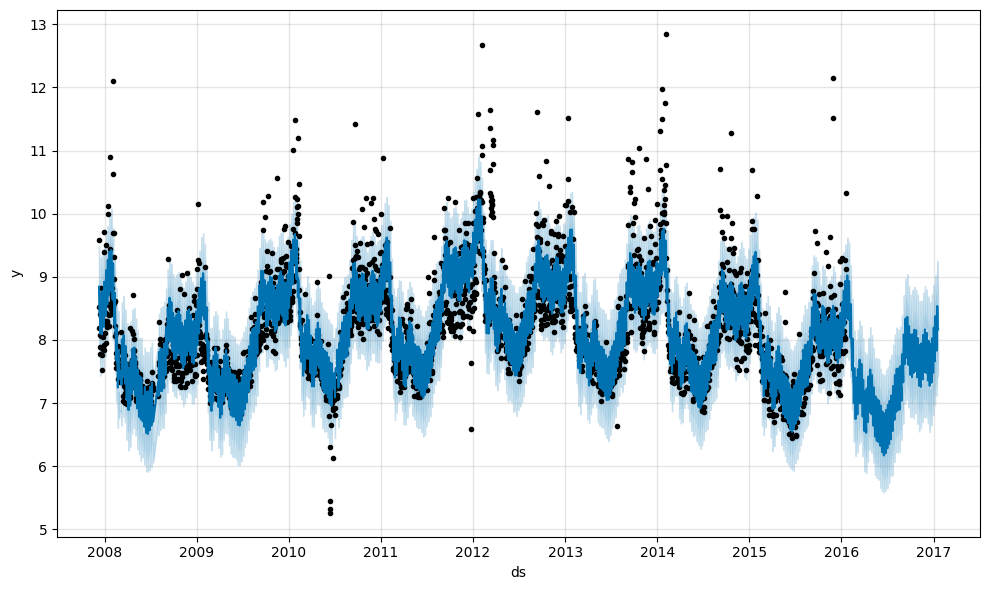

In [7]:
model.plot(forecast);

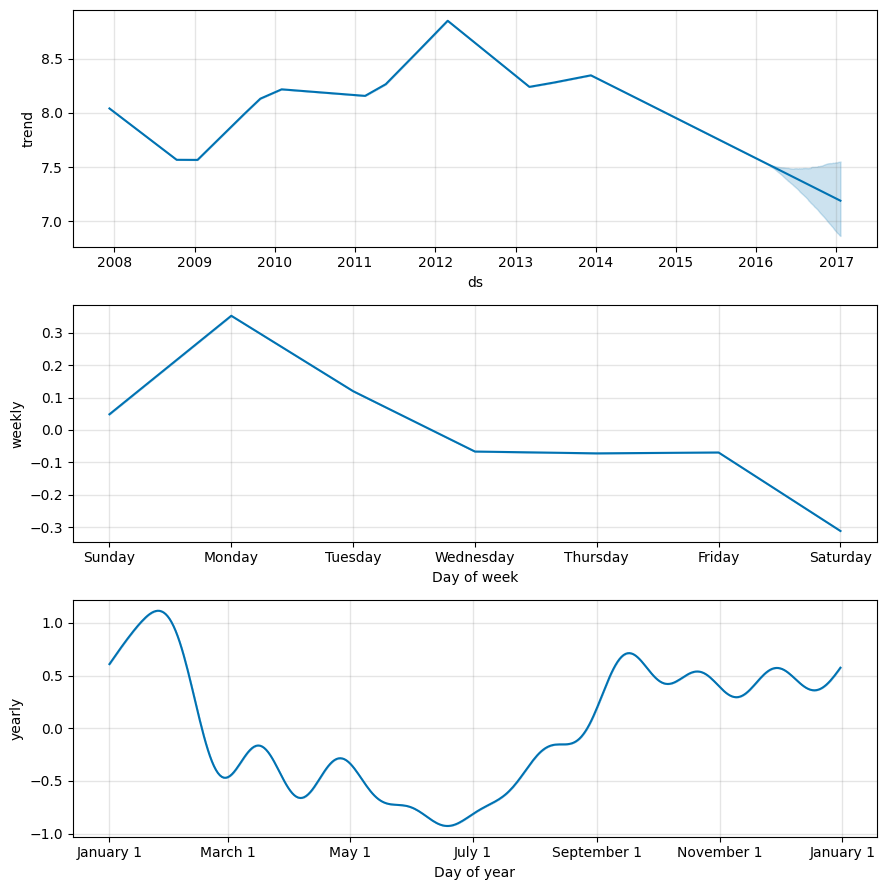

In [8]:
model.plot_components(forecast);

In [9]:
# from fbprophet.diagnostics import cross_validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/11 [00:00<?, ?it/s]

08:53:07 - cmdstanpy - INFO - Chain [1] start processing
08:53:07 - cmdstanpy - INFO - Chain [1] done processing
08:53:07 - cmdstanpy - INFO - Chain [1] start processing
08:53:07 - cmdstanpy - INFO - Chain [1] done processing
08:53:07 - cmdstanpy - INFO - Chain [1] start processing
08:53:08 - cmdstanpy - INFO - Chain [1] done processing
08:53:08 - cmdstanpy - INFO - Chain [1] start processing
08:53:08 - cmdstanpy - INFO - Chain [1] done processing
08:53:08 - cmdstanpy - INFO - Chain [1] start processing
08:53:09 - cmdstanpy - INFO - Chain [1] done processing
08:53:09 - cmdstanpy - INFO - Chain [1] start processing
08:53:09 - cmdstanpy - INFO - Chain [1] done processing
08:53:09 - cmdstanpy - INFO - Chain [1] start processing
08:53:10 - cmdstanpy - INFO - Chain [1] done processing
08:53:10 - cmdstanpy - INFO - Chain [1] start processing
08:53:10 - cmdstanpy - INFO - Chain [1] done processing
08:53:10 - cmdstanpy - INFO - Chain [1] start processing
08:53:11 - cmdstanpy - INFO - Chain [1]

In [10]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.959074,8.477374,9.464753,8.242493,2010-02-15
1,2010-02-17,8.725548,8.252774,9.168213,8.008033,2010-02-15
2,2010-02-18,8.609390,8.092125,9.134886,8.045268,2010-02-15
3,2010-02-19,8.531294,7.997717,9.067330,7.928766,2010-02-15
4,2010-02-20,8.273357,7.781467,8.762000,7.745003,2010-02-15


In [11]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(model, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

08:53:12 - cmdstanpy - INFO - Chain [1] start processing
08:53:13 - cmdstanpy - INFO - Chain [1] done processing
08:53:13 - cmdstanpy - INFO - Chain [1] start processing
08:53:13 - cmdstanpy - INFO - Chain [1] done processing
08:53:14 - cmdstanpy - INFO - Chain [1] start processing
08:53:14 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
# from fbprophet.diagnostics import performance_metrics
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.494752,0.703386,0.505215,0.058538,0.049584,0.058826,0.671540
1,38 days,0.500521,0.707475,0.510201,0.059115,0.049373,0.059463,0.671540
2,39 days,0.522712,0.722988,0.516284,0.059713,0.049505,0.060187,0.670169
3,40 days,0.529990,0.728004,0.519131,0.060018,0.049231,0.060561,0.673824
4,41 days,0.537478,0.733129,0.520118,0.060096,0.049373,0.060702,0.681361


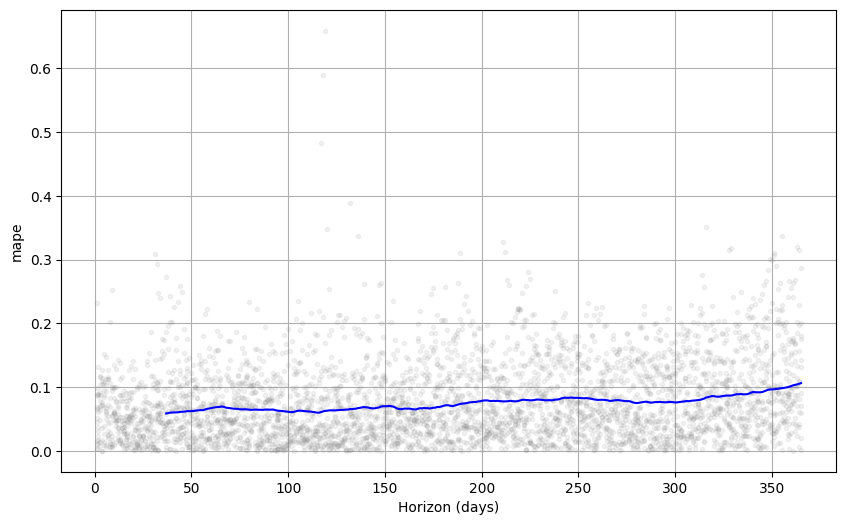

In [13]:
# from fbprophet.plot import plot_cross_validation_metric
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [14]:
# !pip3 install dask
# !pip3 install "dask[distributed]" --upgrade

In [15]:
from dask.distributed import Client
client = Client()  # connect to the cluster
# df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days',parallel="dask")

2022-11-03 08:53:16,122 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/ng/w2vmc_ks6jzfd1prm5s8p54w0000gn/T/dask-worker-space/worker-0f_9mckb', purging
2022-11-03 08:53:16,122 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/ng/w2vmc_ks6jzfd1prm5s8p54w0000gn/T/dask-worker-space/worker-ntwmv2_0', purging
2022-11-03 08:53:16,122 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/ng/w2vmc_ks6jzfd1prm5s8p54w0000gn/T/dask-worker-space/worker-jpwkg8t3', purging


In [16]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],

}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(**params).fit(df)  # Fit model with given params
#     df_cv = cross_validation(model, cutoffs=cutoffs, horizon='30 days', parallel="processes")
#     df_cv = cross_validation(model, cutoffs=cutoffs, horizon='30 days', parallel="dask")
    df_cv = cross_validation(model, initial='730days', period='180days', horizon='365 days', parallel="dask")

    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

08:53:16 - cmdstanpy - INFO - Chain [1] start processing
08:53:16 - cmdstanpy - INFO - Chain [1] done processing
08:53:17 - cmdstanpy - INFO - Chain [1] start processing
08:53:17 - cmdstanpy - INFO - Chain [1] start processing
08:53:17 - cmdstanpy - INFO - Chain [1] done processing
08:53:17 - cmdstanpy - INFO - Chain [1] done processing
08:53:18 - cmdstanpy - INFO - Chain [1] start processing
08:53:18 - cmdstanpy - INFO - Chain [1] start processing
08:53:18 - cmdstanpy - INFO - Chain [1] done processing
08:53:18 - cmdstanpy - INFO - Chain [1] done processing
08:53:18 - cmdstanpy - INFO - Chain [1] start processing
08:53:18 - cmdstanpy - INFO - Chain [1] start processing
08:53:18 - cmdstanpy - INFO - Chain [1] start processing
08:53:18 - cmdstanpy - INFO - Chain [1] start processing
08:53:18 - cmdstanpy - INFO - Chain [1] done processing
08:53:18 - cmdstanpy - INFO - Chain [1] done processing
08:53:18 - cmdstanpy - INFO - Chain [1] done processing
08:53:18 - cmdstanpy - INFO - Chain [1]

08:53:29 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] start processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] done processing
08:53:30 - cmdstanpy - INFO - Chain [1] 

08:53:42 - cmdstanpy - INFO - Chain [1] done processing
08:53:42 - cmdstanpy - INFO - Chain [1] done processing
08:53:42 - cmdstanpy - INFO - Chain [1] start processing
08:53:42 - cmdstanpy - INFO - Chain [1] start processing
08:53:42 - cmdstanpy - INFO - Chain [1] start processing
08:53:42 - cmdstanpy - INFO - Chain [1] done processing
08:53:42 - cmdstanpy - INFO - Chain [1] done processing
08:53:42 - cmdstanpy - INFO - Chain [1] start processing
08:53:42 - cmdstanpy - INFO - Chain [1] done processing
08:53:43 - cmdstanpy - INFO - Chain [1] start processing
08:53:43 - cmdstanpy - INFO - Chain [1] start processing
08:53:43 - cmdstanpy - INFO - Chain [1] done processing
08:53:43 - cmdstanpy - INFO - Chain [1] done processing
08:53:43 - cmdstanpy - INFO - Chain [1] done processing
08:53:43 - cmdstanpy - INFO - Chain [1] start processing
08:53:43 - cmdstanpy - INFO - Chain [1] start processing
08:53:43 - cmdstanpy - INFO - Chain [1] done processing
08:53:43 - cmdstanpy - INFO - Chain [1] 

08:53:56 - cmdstanpy - INFO - Chain [1] start processing
08:53:56 - cmdstanpy - INFO - Chain [1] done processing
08:53:56 - cmdstanpy - INFO - Chain [1] done processing
08:53:56 - cmdstanpy - INFO - Chain [1] start processing
08:53:56 - cmdstanpy - INFO - Chain [1] start processing
08:53:56 - cmdstanpy - INFO - Chain [1] done processing
08:53:56 - cmdstanpy - INFO - Chain [1] done processing
08:53:56 - cmdstanpy - INFO - Chain [1] done processing
08:53:56 - cmdstanpy - INFO - Chain [1] done processing
08:53:57 - cmdstanpy - INFO - Chain [1] start processing
08:53:57 - cmdstanpy - INFO - Chain [1] start processing
08:53:57 - cmdstanpy - INFO - Chain [1] done processing
08:53:57 - cmdstanpy - INFO - Chain [1] start processing
08:53:57 - cmdstanpy - INFO - Chain [1] done processing
08:53:57 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:53:57,638 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
08:53:57 - cmdstanpy - I

08:54:08 - cmdstanpy - INFO - Chain [1] done processing
08:54:08 - cmdstanpy - INFO - Chain [1] start processing
08:54:08 - cmdstanpy - INFO - Chain [1] start processing
08:54:08 - cmdstanpy - INFO - Chain [1] start processing
08:54:08 - cmdstanpy - INFO - Chain [1] start processing
08:54:08 - cmdstanpy - INFO - Chain [1] done processing
08:54:08 - cmdstanpy - INFO - Chain [1] start processing
08:54:08 - cmdstanpy - INFO - Chain [1] done processing
08:54:08 - cmdstanpy - INFO - Chain [1] done processing
08:54:08 - cmdstanpy - INFO - Chain [1] done processing
08:54:08 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:54:08,635 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2022-11-03 08:54:08,673 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2022-11-03 08:54:08,774 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (thres

08:54:18 - cmdstanpy - INFO - Chain [1] start processing
08:54:18 - cmdstanpy - INFO - Chain [1] start processing
08:54:18 - cmdstanpy - INFO - Chain [1] done processing
08:54:18 - cmdstanpy - INFO - Chain [1] done processing
08:54:18 - cmdstanpy - INFO - Chain [1] done processing
08:54:18 - cmdstanpy - INFO - Chain [1] done processing
08:54:18 - cmdstanpy - INFO - Chain [1] start processing
08:54:18 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:54:18,945 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2022-11-03 08:54:18,965 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
08:54:19 - cmdstanpy - INFO - Chain [1] done processing
08:54:19 - cmdstanpy - INFO - Chain [1] start processing
08:54:19 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:54:19,392 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (thres

08:54:28 - cmdstanpy - INFO - Chain [1] done processing
08:54:28 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:54:28,280 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
08:54:28 - cmdstanpy - INFO - Chain [1] done processing
08:54:28 - cmdstanpy - INFO - Chain [1] start processing
08:54:28 - cmdstanpy - INFO - Chain [1] start processing
08:54:28 - cmdstanpy - INFO - Chain [1] done processing
08:54:28 - cmdstanpy - INFO - Chain [1] done processing
08:54:28 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:54:28,735 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-11-03 08:54:28,740 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
08:54:28 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:54:28,839 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time

08:54:43 - cmdstanpy - INFO - Chain [1] done processing
08:54:43 - cmdstanpy - INFO - Chain [1] done processing
08:54:44 - cmdstanpy - INFO - Chain [1] done processing
08:54:44 - cmdstanpy - INFO - Chain [1] done processing
08:54:44 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:54:44,208 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-11-03 08:54:44,265 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
08:54:44 - cmdstanpy - INFO - Chain [1] start processing
08:54:44 - cmdstanpy - INFO - Chain [1] done processing
08:54:44 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:54:44,677 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2022-11-03 08:54:44,783 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
08:54:45 - cmdstanpy - INFO -

08:54:58 - cmdstanpy - INFO - Chain [1] start processing
08:54:58 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:54:58,297 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
08:54:58 - cmdstanpy - INFO - Chain [1] start processing
08:54:58 - cmdstanpy - INFO - Chain [1] start processing
08:54:58 - cmdstanpy - INFO - Chain [1] done processing
08:54:58 - cmdstanpy - INFO - Chain [1] done processing
08:54:58 - cmdstanpy - INFO - Chain [1] done processing
08:54:58 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:54:58,898 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-11-03 08:54:58,932 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
08:54:59 - cmdstanpy - INFO - Chain [1] done processing
08:54:59 - cmdstanpy - INFO - Chain [1] done processing
08:54:59 - cmdstanpy - INFO - Chain [1] start 

2022-11-03 08:55:11,125 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
08:55:11 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:55:11,641 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
08:55:11 - cmdstanpy - INFO - Chain [1] start processing
08:55:12 - cmdstanpy - INFO - Chain [1] done processing
08:55:12 - cmdstanpy - INFO - Chain [1] start processing
08:55:12 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] done processing
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] done processing
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] start processing
08:

08:55:25 - cmdstanpy - INFO - Chain [1] done processing
08:55:25 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:55:25,932 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
08:55:25 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:55:26,120 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
08:55:26 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:55:26,276 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
08:55:26 - cmdstanpy - INFO - Chain [1] done processing
08:55:26 - cmdstanpy - INFO - Chain [1] start processing
08:55:26 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:55:26,754 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
08:55:26 - cmdstanpy - INFO - Chain [1] done processing
08:55:27 - cmdstanpy - INFO -

08:55:42 - cmdstanpy - INFO - Chain [1] done processing
08:55:42 - cmdstanpy - INFO - Chain [1] start processing
08:55:42 - cmdstanpy - INFO - Chain [1] start processing
08:55:42 - cmdstanpy - INFO - Chain [1] done processing
08:55:43 - cmdstanpy - INFO - Chain [1] done processing
08:55:43 - cmdstanpy - INFO - Chain [1] done processing
08:55:43 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:55:43,617 - distributed.utils_perf - WARNING - full garbage collections took 17% CPU time recently (threshold: 10%)
08:55:43 - cmdstanpy - INFO - Chain [1] done processing
08:55:43 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:55:43,963 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
08:55:44 - cmdstanpy - INFO - Chain [1] done processing
08:55:44 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:55:44,049 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (thresho

2022-11-03 08:56:02,254 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
08:56:02 - cmdstanpy - INFO - Chain [1] start processing
08:56:03 - cmdstanpy - INFO - Chain [1] done processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] done processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:04 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:56:05,198 - distributed.utils_perf - WARNING - full garbage collections took 16% CPU time recently (threshold: 10%)
08:56:05 - cmdstanpy - INFO - Chain [1] done processing
08:

08:56:23 - cmdstanpy - INFO - Chain [1] done processing
08:56:23 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:56:23,580 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
08:56:23 - cmdstanpy - INFO - Chain [1] start processing
08:56:24 - cmdstanpy - INFO - Chain [1] done processing
08:56:24 - cmdstanpy - INFO - Chain [1] start processing
08:56:24 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] done processing
08:56:25 - cmdstanpy - INFO - Chain [1] start processing
08:56:25 - cmdstanpy - INFO - Chain [1] done processing
08:56:26 - cmdstanpy - INFO - Chain [1] done processing
08:56:26 - cmdstanpy 

08:56:44 - cmdstanpy - INFO - Chain [1] done processing
08:56:44 - cmdstanpy - INFO - Chain [1] start processing
08:56:44 - cmdstanpy - INFO - Chain [1] start processing
2022-11-03 08:56:44,647 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
08:56:44 - cmdstanpy - INFO - Chain [1] start processing
08:56:44 - cmdstanpy - INFO - Chain [1] start processing
08:56:44 - cmdstanpy - INFO - Chain [1] start processing
08:56:44 - cmdstanpy - INFO - Chain [1] start processing
08:56:44 - cmdstanpy - INFO - Chain [1] done processing
08:56:45 - cmdstanpy - INFO - Chain [1] start processing
08:56:45 - cmdstanpy - INFO - Chain [1] done processing
08:56:45 - cmdstanpy - INFO - Chain [1] start processing
08:56:45 - cmdstanpy - INFO - Chain [1] done processing
08:56:45 - cmdstanpy - INFO - Chain [1] done processing
2022-11-03 08:56:45,911 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
08:5

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                     0.001                     0.01                  0.01   
1                     0.001                     0.01                  0.10   
2                     0.001                     0.01                  1.00   
3                     0.001                     0.01                 10.00   
4                     0.001                     0.10                  0.01   
..                      ...                      ...                   ...   
59                    0.500                     1.00                 10.00   
60                    0.500                    10.00                  0.01   
61                    0.500                    10.00                  0.10   
62                    0.500                    10.00                  1.00   
63                    0.500                    10.00                 10.00   

        rmse  
0   0.691800  
1   0.691800  
2   0.691800  
3  

In [17]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.01}
